In [1]:
!unzip Fruit_Classification2.zip

Streaming output truncated to the last 5000 lines.
  inflating: Fruit_Classification/validation/Apricot/Apricot_249.jpg  
  inflating: Fruit_Classification/validation/Apricot/Apricot_250.jpg  
  inflating: Fruit_Classification/validation/Apricot/Apricot_251.jpg  
  inflating: Fruit_Classification/validation/Apricot/Apricot_252.jpg  
  inflating: Fruit_Classification/validation/Apricot/Apricot_253.jpg  
  inflating: Fruit_Classification/validation/Apricot/Apricot_254.jpg  
  inflating: Fruit_Classification/validation/Apricot/Apricot_255.jpg  
  inflating: Fruit_Classification/validation/Apricot/Apricot_256.jpg  
  inflating: Fruit_Classification/validation/Apricot/Apricot_257.jpg  
  inflating: Fruit_Classification/validation/Apricot/Apricot_258.jpg  
  inflating: Fruit_Classification/validation/Apricot/Apricot_259.jpg  
  inflating: Fruit_Classification/validation/Apricot/Apricot_260.jpg  
  inflating: Fruit_Classification/validation/Apricot/Apricot_261.jpg  
  inflating: Fruit_Classif

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
img_height, img_width = 32,32
batch_size =  20
test_ds = tf.keras.utils.image_dataset_from_directory(
    "Fruit_Classification/test",
    image_size =  (img_height, img_width),
    batch_size =  batch_size
)
train_ds = tf.keras.utils.image_dataset_from_directory(
    "Fruit_Classification/train",
    image_size =  (img_height, img_width),
    batch_size =  batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "Fruit_Classification/validation",
    image_size =  (img_height, img_width),
    batch_size =  batch_size
)

Found 5876 files belonging to 33 classes.
Found 5657 files belonging to 33 classes.
Found 5321 files belonging to 33 classes.


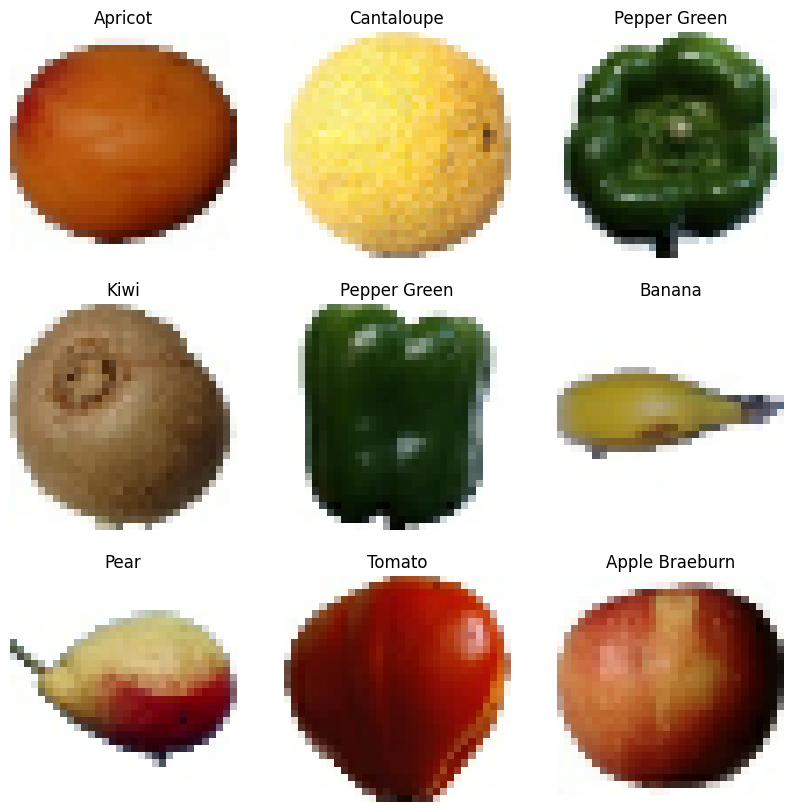

In [4]:
class_names = ["Apple Braeburn","Apple Granny Smith","Apricot","Avocado","Banana", "Blueberry", "Cactus fruit", "Cantaloupe", "Cherry", "Clementine", "Corn","Cucumber Ripe", "Grape Blue", "Kiwi", "Lemon", "Limes", "Mango", "Onion White", "Orange", "Papaya", "Passion Fruit", "Peach", "Pear", "Pepper Green","Pepper Red", "Pineapple", "Plum", "Pomegranate", "Potato Red", "Raspberry", "Strawberry", "Tomato", "Watermelon"]
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range (9):
    ax = plt.subplot(3, 3, i +1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3 , activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3 , activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(33),
    ]
)

In [6]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [7]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
283/283 [==============================] - 16s 51ms/step - loss: 1.2149 - accuracy: 0.6456 - val_loss: 0.2520 - val_accuracy: 0.9079
Epoch 2/10
283/283 [==============================] - 11s 38ms/step - loss: 0.1786 - accuracy: 0.9418 - val_loss: 0.0983 - val_accuracy: 0.9703
Epoch 3/10
283/283 [==============================] - 12s 42ms/step - loss: 0.0602 - accuracy: 0.9830 - val_loss: 0.0481 - val_accuracy: 0.9844
Epoch 4/10
283/283 [==============================] - 11s 39ms/step - loss: 0.0737 - accuracy: 0.9791 - val_loss: 0.0564 - val_accuracy: 0.9829
Epoch 5/10
283/283 [==============================] - 12s 43ms/step - loss: 0.0190 - accuracy: 0.9961 - val_loss: 0.0052 - val_accuracy: 0.9989
Epoch 6/10
283/283 [==============================] - 11s 40ms/step - loss: 0.0557 - accuracy: 0.9846 - val_loss: 0.0397 - val_accuracy: 0.9872
Epoch 7/10
283/283 [==============================] - 12s 43ms/step - loss: 0.0108 - accuracy: 0.9977 - val_loss: 0.0029 - val_accuracy:

In [8]:
model.evaluate(test_ds)

294/294 [==============================] - 3s 9ms/step - loss: 0.0019 - accuracy: 0.9995


[0.0019225371070206165, 0.999489426612854]

In [9]:
import numpy as np


plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  print(classifications)

tf.Tensor(
[[ 2.65614605e+00 -4.59812889e+01 -1.86429005e+01 -1.93088341e+01
  -2.78262115e+00 -2.22582912e+01 -1.71418247e+01 -3.42028275e+01
  -6.42252207e+00 -1.11617985e+01 -2.47628918e+01  4.58533096e+00
  -1.25223846e+01 -2.25549221e+00 -3.79252701e+01 -3.03316307e+01
  -3.02181034e+01  1.62960753e-01 -3.15467987e+01 -1.34592209e+01
  -1.22859392e+01 -2.36817074e+00 -2.45111489e+00 -2.05019989e+01
   9.21084309e+00  3.30068541e+00  1.05486889e+01  2.47128353e+01
  -1.44406090e+01 -1.75670395e+01  4.21017885e+00 -5.01584673e+00
  -2.26815739e+01]
 [ 1.14343357e+01 -5.01137657e+01  1.89038944e+01 -4.90177956e+01
  -9.03652668e+00 -7.68972702e+01 -2.15003605e+01 -8.04894161e+00
  -3.36891212e+01  3.60570602e+01 -2.30826626e+01 -2.21264133e+01
  -4.33117294e+01 -1.15322285e+01 -6.60377073e+00 -3.62334785e+01
  -8.77087021e+01 -5.12795091e-01  1.28914571e+00 -2.41804161e+01
  -5.55851173e+01  2.67813816e+01 -1.28853929e+00 -4.70137444e+01
  -8.80911648e-01 -3.11290359e+01 -3.43084297e

<Figure size 1000x1000 with 0 Axes>

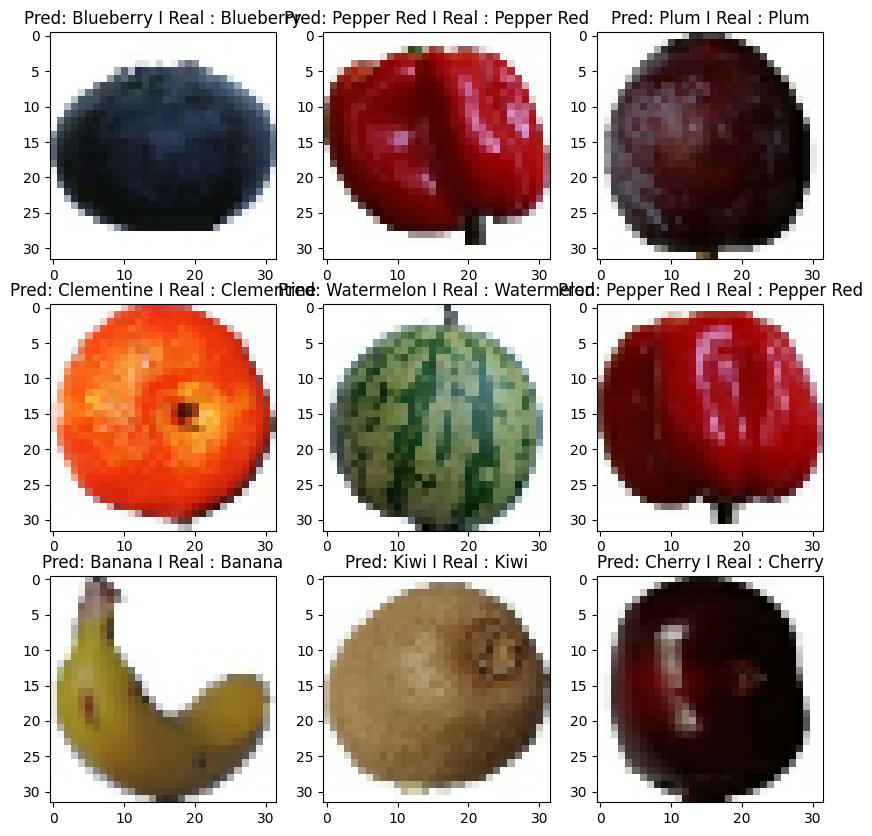

In [11]:
import numpy as np


plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  #print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = np.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " I Real : " + class_names[labels[i]])

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)